In [1]:
library(GLMsData)
library(statmod)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(triangle)

In [3]:
str(triangle)

'data.frame':	20 obs. of  3 variables:
 $ y : num  10.1 11.6 10.4 13 12.3 11.1 11.4 11.3 10.1 9.7 ...
 $ x1: num  5.3 5.4 4.5 4.7 6.6 4.2 5 4.2 5.6 5.6 ...
 $ x2: num  8.5 10.3 9.4 12.2 10.4 10.3 10.2 10.4 8.5 7.9 ...


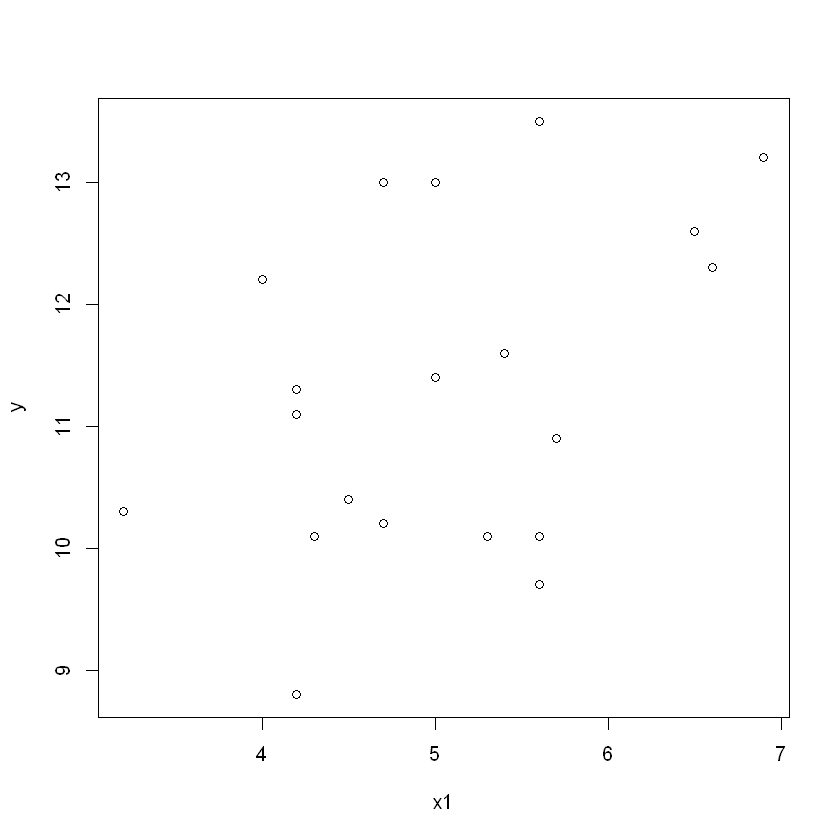

In [4]:
plot(y ~ x1, data=triangle)

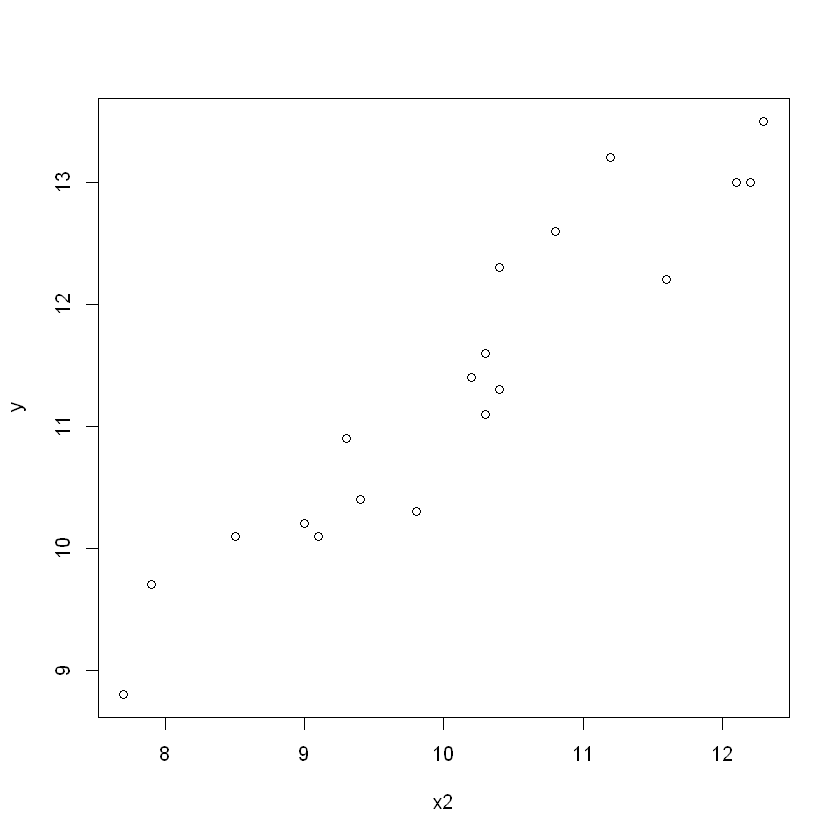

In [6]:
plot(y ~ x2, data=triangle)

In [7]:
m1 <- glm( y~I(x1^2) + I(x2^2), data=triangle,
family=quasi(link=power(lambda=2), variance="constant"))

In [8]:
m2 <- glm( y~I(x1^2) + I(x2^2), data=triangle,
family=quasi(link=power(lambda=2), variance="mu^2"))

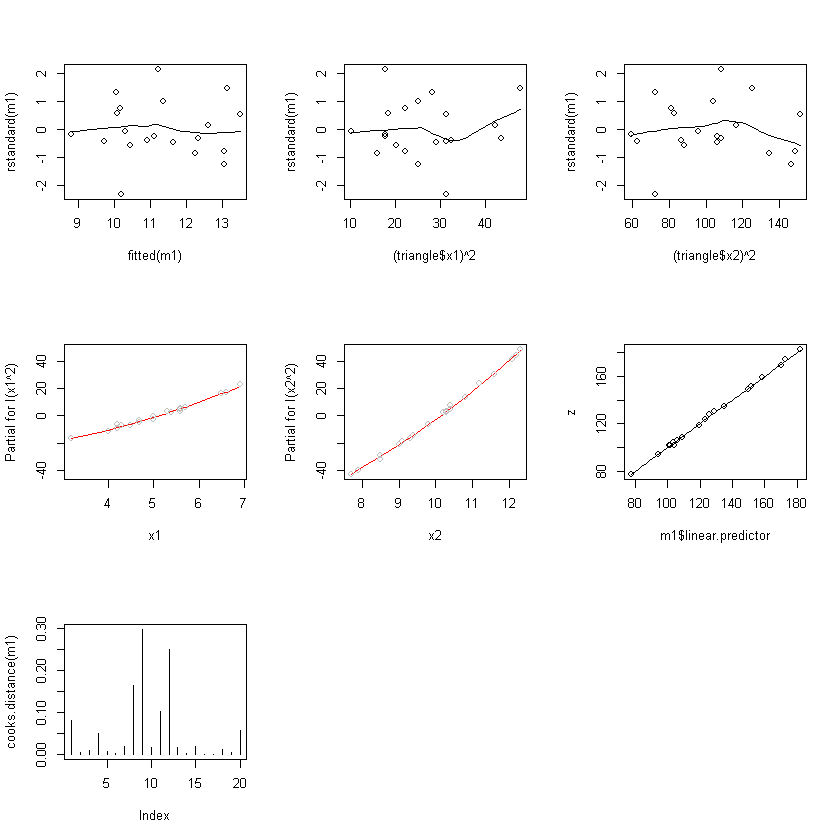

In [13]:
par(mfrow=c(3, 3))
scatter.smooth( rstandard(m1)~fitted(m1))
scatter.smooth(rstandard(m1) ~ (triangle$x1)^2)
scatter.smooth(rstandard(m1) ~ (triangle$x2)^2)
z <- resid(m1, type="working") + m1$linear.predictor
termplot(m1, partial.resid = TRUE, )
scatter.smooth(z ~ m1$linear.predictor)
plot(cooks.distance(m1), type="h")

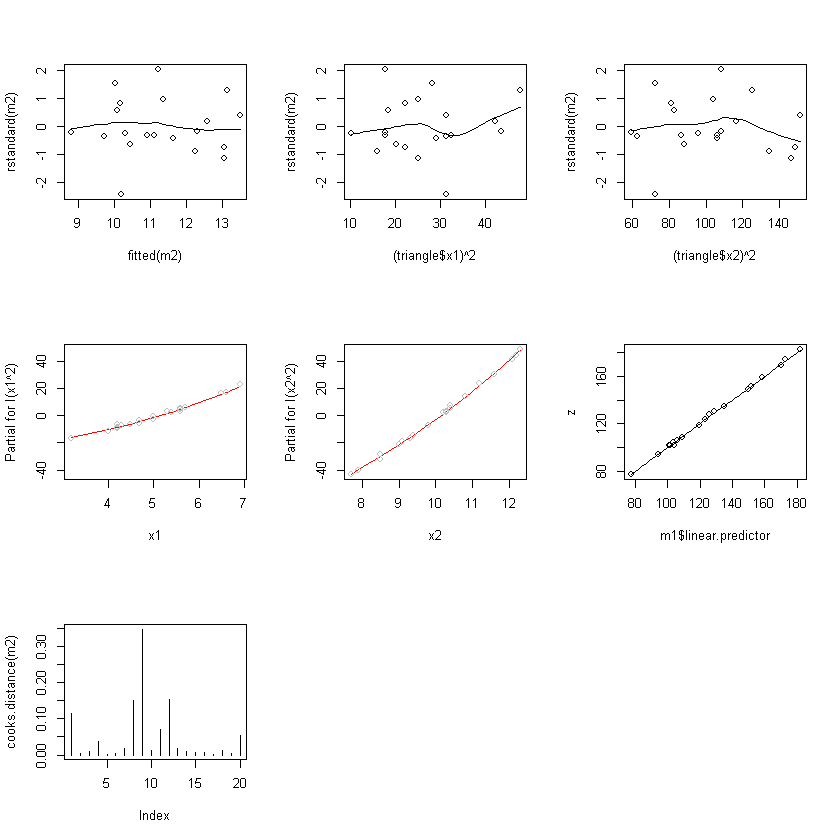

In [14]:
par(mfrow=c(3, 3))
scatter.smooth( rstandard(m2)~fitted(m2))
scatter.smooth(rstandard(m2) ~ (triangle$x1)^2)
scatter.smooth(rstandard(m2) ~ (triangle$x2)^2)
z <- resid(m2, type="working") + m2$linear.predictor
termplot(m2, partial.resid = TRUE, )
scatter.smooth(z ~ m1$linear.predictor)
plot(cooks.distance(m2), type="h")